# **AP155 Lab Assignment** 
## Module 7: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 30 and 70 points, respectively).

_Due Date_: **5PM of January 7 (Fri)**


### Student Information 

_Full Name (Last Name, First Name)_: Baldres, Jonabel Eleanor B. \
_Student No._: 2020-07278\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 6 January 2022

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: sgd. Jonabel Eleanor Baldres** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (30 pts.; 50/50 for code & discussion) 
**Integration with Monte Carlo methods**

_Refer to Exercise 10.5 in the Newman text_ 

1. Evaluate this integral 
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$
using the "hit-or-miss" Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate. *(15 pts.)*

2. Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error. *(15 pts.)*

In [157]:
#importing necessary functions
import numpy as np
from numpy import sin, random, linspace, sqrt, array, var
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

In this problem, we know that the bounding rectangle is $A=2$. If we choose a point inside the rectangle, the probability that it is under the curve of the integral $I$ is $p = I/A$. Generating a large number of points $N$, we can count the number of points $k$ that fall under the curve and the fraction of points under the curve is $k/N$ is approximately equal to the probability $p$. With that, we can solve $I$ through the equation

\begin{align}
I ≃ \frac{kA}{N}
  \end{align}

Moreover, the error of the integral can be obtained by the equation:
\begin{align}
  \sigma = \sqrt{\text{var}k} \frac{A}{N} = \frac{\sqrt{I(A-I)}}{\sqrt{N}}
  \end{align}

In [158]:
def f(x):
  '''defining the function providedd'''
  return (np.sin(1/(x*(2-x))))**2

N = 10000 #number of points
count = 0 
A = 2

for i in range(N):
  x = A*np.random.random() #random() gives a floating number uniformly distributed in the range from  0 (included) to 1 (not included).
                 # this means that if A is multiplied by random(), x falls within the bounding rectangle
  y = np.random.random()
  if y < f(x):   #if y is less than the value of f(x), the initial/previous value for count adds 1 and becomes the new value for count
    count += 1

I = 2*count/N #solving for the integral
sigma = (np.sqrt(I*(A-I))) / (np.sqrt(N))
print("The value of the integral is "+str(I)+" with an error of " + str(sigma))

The value of the integral is 1.4524 with an error of 0.008918151377948236


**2** \
Finding the integral using the mean value method, we use its formula

\begin{align}
I  ≃ \frac{b-a}{N} \sum_{i=1}^{N} f(x_i)
  \end{align}

With the formula for its error given by
\begin{align}
\sigma = (b-a) \frac{\sqrt{\text{var} f}}{\sqrt{N}}
  \end{align}

In [159]:
a,b = 0,2 #letting a=0 and b=2
sum = 0
F = [] #to store the values of f(x) which will be used later on to calculate the variance
for i in range(N):
  x=A*np.random.random() #random() gives a floating number uniformly distributed in the range from  0 (included) to 1 (not included).
                # this means that if A is multiplied by random(), x falls within the bounding rectangle
  F.append(f(x)) #appends value of f(x) in the range(N)
  sum += f(x)  #adds f(x) to the initial/previous value of sum and storing it as the new value of sum

#solving for the integral and error respectively
I_mvm=(sum*(b-a))/N 
sigma=(b-a)*np.sqrt(np.var(F))/np.sqrt(N)
print("The value of the integral is "+str(I)+" with an error of " + str(sigma))

The value of the integral is 1.4524 with an error of 0.005296994940045913


### PROBLEM 2 (70 pts.; 50/50 for code & discussion) 
**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(20 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(20 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(20 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(10 pts.)*

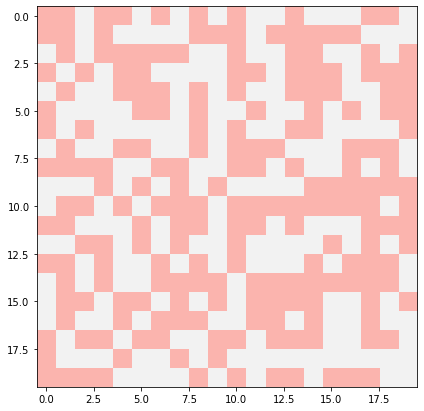

In [160]:
#creating the variables and parameters
size= 20 #size
J = 1
T = 1
kb = 1
beta = 1
s = 0 

#creating the lattice
lattice = np.random.choice([-1,1], size = [size,size])

#plotting the lattice 
plt.rcParams["figure.figsize"] = (10,7)
plt.imshow(lattice, cmap = 'Pastel1')
plt.show()

From the illustration above, it can be seen that the distribution of -1s (pink pixel) and 1s (white pixel) are random. Using the starting lattice, we start creating the Ising model using the Metropolist algorithm. 

We take note of the acceptance probability $P_a$ given by 

\begin{align}
  P_a = 
\begin{cases} 
      1 & if E_j ≤ E_i \\
      e^{-\beta (E_j - E_i)} & if E_j ≥ E_i
   \end{cases}
  \end{align}

where $E_{new}$ is the energy of the system after inversion, $E$ is the energy of the system before the inversion, and $\beta = \frac{1}{Tk_b}$.

The equation tells us that if the move is rejected, the system remains as it is. If the move is accepted, the system changes into a new state. 


In [161]:
# for the total energy of the system
def solve_E_total(lattice):
    total_row = 0
    total_col = 0
    for i in range(len(lattice)):
        try:
            total_row += np.sum(lattice[i, :]*lattice[i+1, :])
        except:
            continue
    for j in range(len(lattice)):
        try:
            total_col += np.sum(lattice[:, j]*lattice[:, j+1])
        except:
            continue
    return -J*(total_row + total_col)


In [162]:
# for the energy of a single particle
def solve_E(lattice, x, y):
  '''solves the energy of a single particle'''
  E = 0
  try:
      E += lattice[x,y]*lattice[x+1,y]
  except:
      pass
  
  try:
      E += lattice[x,y]*lattice[x, y+1]
  except:
      pass
  
  if x != 0:
      E += lattice[x,y]*lattice[x-1, y]
  if y != 0:
      E += lattice[x,y]*lattice[x, y-1]
  return -J*E

# for the acceptance probability
def solve_Pa(E, Enew):
  '''solves the acceptance probability'''
  pa = 0
  if Enew <= E:
      pa = 1
  else:
      pa = np.exp(-beta*(Enew - E))
  return pa

def Total_Magnetization(newlattice):
  '''calculates the total magnetization over N steps'''
  return np.sum(lattice)


In [163]:
E = solve_E_total(lattice)
print("The total energy of the system is: " + str(E), " units")

The total energy of the system is: 52  units


Given the total energy, we can now apply the Metropolist algorithm. 

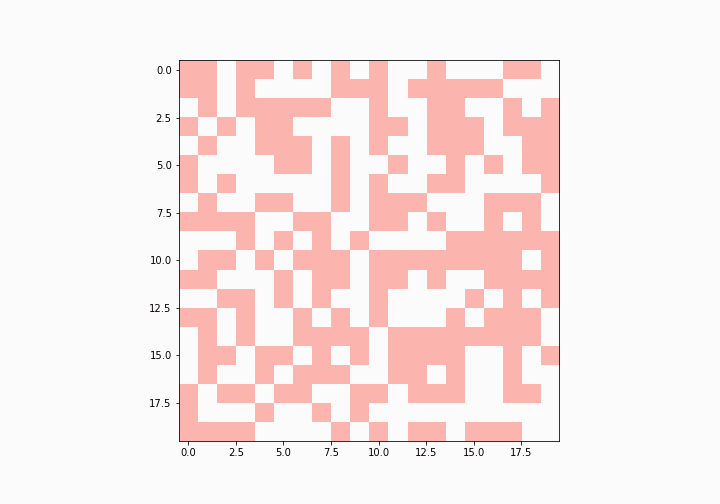

In [164]:
# intializing the constants
N = 1000000                 #number of steps
counter = 0                 #determines the frame to save
frames = []                 #list used for generating the gif
Magnetization_list = []     #stores the total magnetization
fig = plt.figure()
for i in range(N+1):
    # choosing a random lattice spin at coordinates x,y.
    x = np.random.randint(0,size)
    y = np.random.randint(0,size)
    
    # calculate values for initial energy
    E = solve_E(lattice, x, y)
    
    # creating a copy of the lattice if the inversion is rejected
    backup_lattice = lattice.copy()
    
    # inverting the particle
    lattice[x,y] *= -1

    # calculate new value for energy
    Enew = solve_E(lattice, x, y)
    
    # solve for acceptance probability
    pa = solve_Pa(E, Enew)

    # Appends magnetization to the list and shall be used later on to plot the total magnetization 
    Magnetization_list.append(Total_Magnetization(lattice))

    # conditions for the acceptance or rejection of the inversion and plotting it to create the needed animation
    if pa < 1:
        if np.random.rand() <= pa:
            if counter%100 == 0:
                frames.append([plt.imshow(lattice, cmap = "Pastel1")])
            counter +=1 
        elif np.random.rand() > pa:
            lattice[:] = backup_lattice[:]
           
    else: 
        if counter%100 == 0:
            frames.append([plt.imshow(lattice, cmap = "Pastel1")])
        counter +=1


# Compiling the frames into a gif
plt.close()
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
writergif = animation.PillowWriter(fps=15)
ani.save('Problem 1 animation.gif',writer=writergif)

Image(filename = "Problem 1 animation.gif")

From the illustration above, we can see that the 1s and -1s cluster together. This shows the *spontaneous magnetization* of the lattice. Since each individual spin interacts with their neighboring spin, it is better (in terms of energy) if they align themselves in the same direction since having opposite spins results to lower energy. 

Upon running the program a number of times, when the total energy is negative, the total magnetization over time is also negative. The same explanation holds when the total energy calculated is positive. In the graph below, we can see that there is a tremendous jump from low magnetization to high magnetization in the first few steps. After the jump, the magnetization seems to be constant.

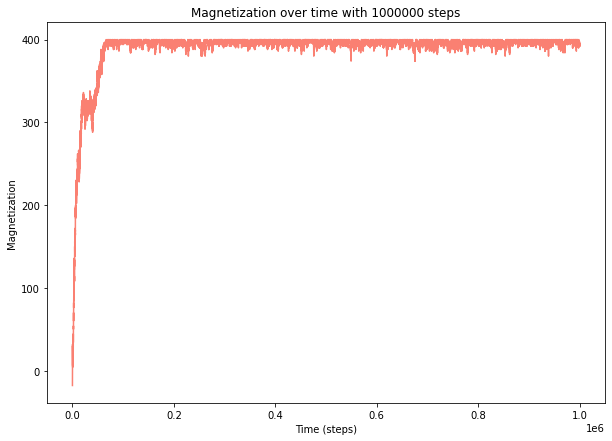

In [165]:
#plot the Magnetization_list
plt.rcParams["figure.figsize"] = (10,7)
plt.title('Magnetization over time with 1000000 steps')
plt.xlabel('Time (steps)')
plt.ylabel('Magnetization')
plt.plot(Magnetization_list, color = 'salmon')
plt.show()